# Obsah

## Trenovacia / testovacia / validacna vzorka

## Krizova validacia

## Metriky vyhodnocovania

## Hyperparameter tuning

## Overfitting

## Variance / Bias 

# Motivacia pre vyhodnocovanie klasifikatorov

Existuje sptrane vela pristupov a typov klasifikatorov. ** Ktory z nich je najlepsi? **

Rozne klasifikatory maju rozne parametre. ** Ako nastavit klasifikator tak, aby daval najlepsie vysledky? ** 

![classifiers](img/MachineLearningAlgorithms.png)

zdroj obrazku: [https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

Existuje velmi vela roznych algoritmov na klasifikaciu ale aj na dalsie ulohy strojoveho ucenia. Kazdy z nich ma trochu ine vlastnosti a hodi sa na iny problem. Casom sa da vytvorit nejaka intuicia o tom kde sa co hodi. Vzdy ale treba zistit, ktory z algoritmov funguje na nas konkretny problem najlepsie.

Pre nas zaujimave rozdelenie moze vyzerat napriklad takto.

### Instance based
* porovnavajuce jednotlive pozorovania na zaklade nejakej podobnosti
* kNN

### Decision Tree
* rozdelovanie priestoru na zaklade hodnoty atributu a funkcie maximalizujucej rozdielnost roznych vetiev
* C4.5
* ID3
* ...

### Ensamble
* spajanie viacerych modelov dohromady a vyuzivajuce to, ze niektore modely mozu byt lepsie na rozne problemy a vedia sa spajat napriklad hlasovanim alebo kaskadou
* Bagging
* Boosting
* Stacking
* Random forest

### Bayesian
* algoritmy vyzuivajuce bayesovske prvidlo na pocitanie podmienenych pravdepdoobnosti
* Naive Bayes
* Multinomial Naive Bayes
* Gausian Naive Bayes

### Linear 
* Algoritmy rozdelujuce priestor hodnot nejakou hyper-rovinou.
* Logistic regression
* SVM
* Perceptron

## GOTO
* [IAML: Decision Trees - slides](http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/dt.pdf)
* [IAML: Decision Trees - video](https://www.youtube.com/playlist?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO)

In [292]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [293]:
plt.rcParams['figure.figsize'] = 9, 6

# Dataset

In [294]:
from sklearn.datasets import load_breast_cancer

In [295]:
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [296]:
label_names

array(['malignant', 'benign'],
      dtype='<U9')

In [297]:
labels[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [298]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [299]:
features

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [300]:
df = pd.DataFrame(features)
df.columns = feature_names
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [301]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [21]:
# %%time
# seaborn.pairplot(df, hue="target")
# plt.savefig('img/breast_cancer_pairplot.png')

## CPU times: user 4min 46s, sys: 3min 59s, total: 8min 46s
## Wall time: 4min 13s

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


CPU times: user 4min 46s, sys: 3min 59s, total: 8min 46s
Wall time: 4min 13s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[pairplot](img/breast_cancer_pairplot.png)
![pairplot](img/breast_cancer_pairplot.png)

# Trenovacia / testovacia vzorka

Aby sme dostali prdstavu o tom aky dobry model sme vytvorili, potrebujeme ho otestovat. Testovat by sme mali na inych datach ako sme trenovali. Priamociary sposob na toto je rozdelit nase data na trenovaciu a testovaciu vzorku v nejakom pomere.

In [302]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

Nikdy sa nesmie model trenovat a testovat na tych istych datach. Hrozilo by nam, ze 

In [303]:
# natrenujeme si nejaky klasifikator
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
model = cls.fit(train, train_labels)

Teraz uz mame natrenovany model na trenovacich datach. Co sa stane ak skusime predikovat vysledky na trenovacich datach?

In [304]:
cls.score(train, train_labels)

0.99737532808398954

In [305]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(train)
accuracy_score(train_labels, train_preds)

0.99737532808398954

Tento vysledok presnosti klasifikacie je na datach, ktore model pouzival na ucenie. Nehovori nam to nic o tom ako sa bude model spravat v pripade ak mu ukazeme data, ktore nikdy nevidel. Prave kvoli tomu sme si vytvorili testovaciu vzorku. Testovacie data nikdy neboli pouzite na trenovanie a teda uspesnost na tychto datach by nam mala dat realnejsiu predstavu o kvalite modelu.

In [306]:
cls.score(test, test_labels)

0.93085106382978722

In [307]:
preds = model.predict(test)
accuracy_score(test_labels, preds)

0.93085106382978722

Uspesnost na testovacej vzorke je spravidla mensia ako na trenovacej vzorke. Ved ten model nikdy testovacie data nevidel a teda moze vyuzivat len skryte vztahy, ktore sa skutocne naucil. 

Ak je velky rozdiel medzi trenovacou a testovacou chybou, tak by to mohlo znamenat, ze je model pretrenovany. Ze sa naucil data naspamat a nie tie skryte pravidla, ktore su vseobecne a platne aj pre data, ktore nikdy nevidel.

# Krizova validacia

Ked mame malo dat, tak nechceme odstrihnut vyznamnu cast dat na testovanie a nikdy ich nepouzit na trenovanie. Ved to je skoda. Co ked prave v tychto datach bolo nieco, co by tomu modelu vyznamne pomohlo?

POuziva sa preto krizova validacia

In [65]:
from sklearn.model_selection import cross_val_score

cls = RandomForestClassifier()
scores = cross_val_score(cls, features, labels, cv=5)
print(scores)
print(scores.mean())

[ 0.89565217  0.93913043  0.95575221  0.95575221  0.96460177]
0.942177760677


{'boxes': [<matplotlib.lines.Line2D at 0x7f42ff5c48d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f42ff8f8c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f430bd84dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f42feca0c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4308547240>,
  <matplotlib.lines.Line2D at 0x7f42fec98c50>]}

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


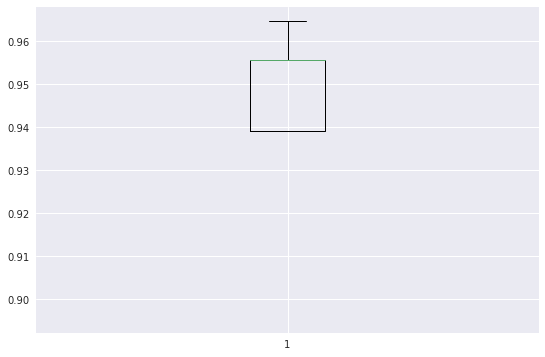

In [66]:
plt.boxplot(scores)

In [67]:
%%time

from sklearn.model_selection import LeaveOneOut

cls = RandomForestClassifier()
scores = cross_val_score(cls, features, labels, cv=LeaveOneOut())
print(scores)
print(scores.mean())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

Pri leave one out sa pouziva maximalne mnozstvo dat na trenovanie a zaroven aj vsetky data na testovanie. Samostatne skore ale nemaju zmysel. Zmysel ma len ich priemer.

## Krizova validacia vytvori *k* modelov, ako vybrat ten, ktory sa pouzije v produkcii na predikciu?

Nijak. Pouzivajte krizovu validaciu na najdenie najlepsieho nastavenia (vyber algoritmov, atributov a hyperparametrov). Ked toto spravite, tak natrenujte uplne novy model na vsetkych datach, ktore mate a pustite to do produkcie.

Pokial nepotrebujete niekomu vopred odhadnut aka asi bude uspesnost na neznamys datach. Vtedy budete potrebovat nejaku testovaciu vzorku, ktoru nepouzijete na trenovanie.

## Existuju aj dalsie sposoby ako rozdelit trenovacie a testovacie data
* Pri inkrementalnom spracovani sa pouziva Test-then-train kde sa najskor pouziju data na overenie chyby modelu a potom sa pouziju na upravenie modelu
* Ak mame zavislosti medzi pozorvaniami (casove, generovanie spolocnym procesom / pouzivatelom), tak je mozne upravit rozdelovanie tak, aby sa nachadzali zavisle pozorovania spolu alebo aby boli rovnomerne rozdelene medzi sady

# Metriky vyhodnocovania

Existuje strasne vela roznych metrik na vyhodnocovanie klasifikacie/regresie/zhlukovania ... Vela z nich je uz predpriprvenych v SciKit kniznici.

http://scikit-learn.org/stable/modules/model_evaluation.html

Dnes sa budeme venovat hlavne klasifikacii, ale vsetky tieto koncepty su aplikovatelne aj pre ine ulohy analyzy dat, len s pouzitim zodpovedajucich metrik na vyhodnocovanie.

![classification metrics](img/metrics.png)

Zdroj obrazka: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [178]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
model = cls.fit(train, train_labels)
cls.score(test, test_labels)

0.93617021276595747

In [180]:
preds = model.predict(test)
accuracy_score(test_labels, preds)

0.93617021276595747

![confusion matrix](img/confusion_matrix2.png)

**Accuracy (spravnost)** - kolko pozoorvani ste oznacili spravne
$$accuracy = \frac{TP + TN}{ALL}$$

In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, preds)

array([[ 62,   5],
       [  7, 114]])

In [182]:
(62 + 114) / (62 + 5 + 7 + 114)

0.9361702127659575

## Limitacie accuracy

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


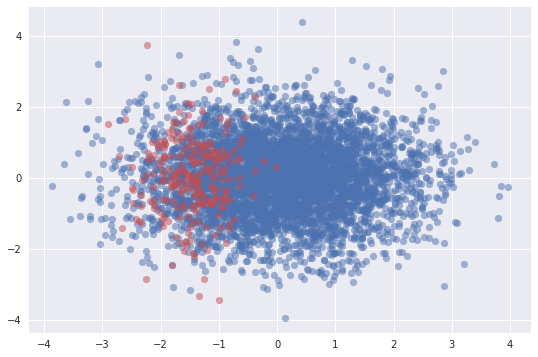

In [219]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=2, class_sep=1, weights=[0.95, 0.05],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [221]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.95866666666666667

In [222]:
accuracy_score(y_test, np.zeros(len(y_pred)))

0.95199999999999996

**Precision (presnost)** - kolko z tych, co ste oznacili ako pozitivna trieda malo naozaj pozitivnu triedu
$$precision = \frac{TP}{TP + FP}$$

**Recall (pokrytie)** - Kolko zo vsetkych s pozitivnou triedou ste dokazali oznacit ako pozitivna trieda
$$recall = \frac{TP}{TP + FN}$$

In [223]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred))
print(precision_score(y_test, np.zeros(len(y_pred))))

0.75
0.0


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [224]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))
print(recall_score(y_test, np.zeros(len(y_pred))))

0.208333333333
0.0


In [225]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))
print(f1_score(y_test, np.zeros(len(y_pred))))

0.326086956522
0.0


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## V pripade predikcie do viacerych tried ma zmysel ukazat vysledky pre jednotlive triedy (niektore metriky sa inak ani nedaju spocitat)

![multiclass confusion matrix](img/multi-class-confusionmatrix.png)

$$ precision A = \frac{TP_A}{TP_A+FP_A} $$
$$ = \frac{TP_A}{Total predicted as A} $$
$$ = \frac{TP_A}{TotalPredicted_A} $$
$$ = \frac{30}{60} $$
$$ = 0.5 $$

recall sa pocita obdobne

Ak chcete prezentovat jedno cislo, tak sa pocita priemerna hodnota. To ake vahy sa priradia jednotlivym triedam rozhoduje o vlastnostiach vysledneho cisla (teda pri nevyvazenych datasetoch).
* Na zaklade vah / pocetnosti
* Macro
* Micro

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


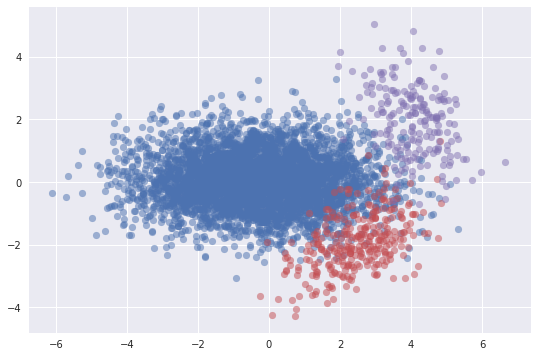

In [251]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=3, class_sep=2, weights=[0.9, 0.06, 0.04],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [253]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.996

In [254]:
confusion_matrix(y_test, y_pred)

array([[1328,    0,    1],
       [   2,   97,    0],
       [   3,    0,   69]])

In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

             precision    recall  f1-score   support

          0    0.99625   0.99925   0.99775      1329
          1    1.00000   0.97980   0.98980        99
          2    0.98571   0.95833   0.97183        72

avg / total    0.99599   0.99600   0.99598      1500



In [256]:
print(precision_score(y_test, y_pred, average='weighted')) # pouziva sa vaha rovna poctu pozoorvani per trieda
print(precision_score(y_test, y_pred, average='micro')) # pouziva sa globalny pocet TP, FN a FP
print(precision_score(y_test, y_pred, average='macro')) # spocita presnost pre kazdu triedu zvlast a spocita ich nevazeny priemer

0.995990954882
0.996
0.99398778266


In [257]:
print(precision_score(y_test, np.zeros(len(y_pred)), average='weighted'))
print(precision_score(y_test, np.zeros(len(y_pred)), average='micro'))
print(precision_score(y_test, np.zeros(len(y_pred)), average='macro'))

0.784996
0.886
0.295333333333


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ak mame nevyvazeny dataset a zaujimaju nas aj triedy, ktore su malo pocetne, tak macro priemerovanie je velmi uzitocne

Obdobny sposob vypoctu je aj pre dalsie metriky ako naporiklad Recall alebo F1

### Logarithmic loss (Logloss)
Ak mame algoritmus, ktory predikuje pravdepodobnost toho, ze nejake pozorovanie patri do triedy, tak vieme penalizovat model proporcne k tomu, ako si je isty svojou predikciou

In [261]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
results = cross_val_score(model, features, labels, cv=10, scoring='neg_log_loss')

In [262]:
(results.mean(), results.std()) # cim mensia hodnota, tym lepsie

(-0.11380128802136986, 0.031145086149948636)

Penalizacia za nespravne zaradenie do triedy zavisi od toho, ako velmi sme si isty, ze to tam patri. 

$$log loss = -\frac{1}{N}\sum_{i=1}^N {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$$


In [ ]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll


V extremnom pripade by sa mohlo stat, ze povieme, ze je to na 100% nieco a je to nieco ine. Vtedy by sa stalo, ze suma logaritnickych penalizacii by bola nekonecna. To by sposobilo, ze jedno pozorovanie mi rozhodi cely experiment. Aby sa to nestalo, je tam maly epsilon, ktory reguluje tieto extremne hodnoty.

# ROC krivka a Obsah pod krivkou - Area Under ROC Curve (AUC)

True positive rate (Sensitivity) a False positive rate (Specificity) su navzajom prepojene. 
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

Ak nastavujeme hranicnu pravdepodobnsot na zaradenie pozorovania do jednej triedy v prospech k jendej hodnote, tak ta druha sa meni s nou. Receiver Operating Characteristic (ROC) hovori, ako navzajom sivisia. Chceme, aby tato hodnota bola co najvyssia.

In [263]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2] # klasicka ROC kryvka sa pouziva len na binarnu klasifikaciu, budeme teda klasifikovat len jednu triedu
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


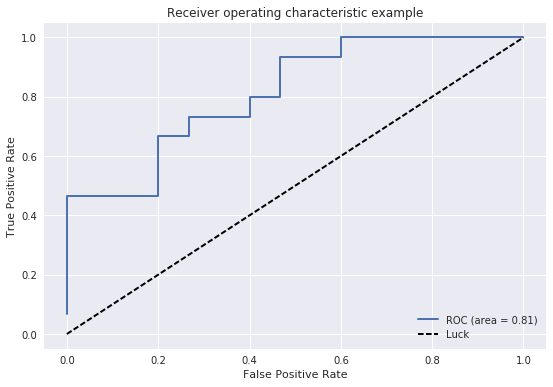

In [265]:
# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test) # chcem pravdepodobnosti zaradenia do tried


fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1]) # z pravdepodobnosti vypocitam body roc krivky
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', # nahodny klasifikator by spravil rovnu ciaru
         label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [267]:
# ak nechcem obrazok, tak zapis je takmer rovnaky ako keby som pouzival logloss alebo nieco ine
from sklearn.metrics import roc_auc_score
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.81333333333333324

### Ak chceme upravit ROC pre cross validaciu, tak si mozeme vykreslit krivky pre kazdy fold ako aj priemernu kryvku

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


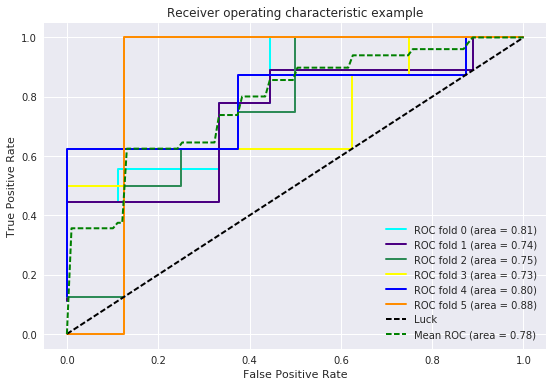

In [268]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [270]:
# podobneaj pri cross validacii, ak ma nezaujimaju obrazky, tak je zapis jednoduchy
roc_auc_scores = cross_val_score(model, X, y, cv=6, scoring='roc_auc')
(roc_auc_scores.mean(), roc_auc_scores.std())

(0.7157921810699589, 0.083100414980961185)

### Podobne sa to da pouzit aj na ROC na viacerych triedach aj ked to priamo na takyto pripad nie je urcene

In [271]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [272]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
transformed_target = lb.fit_transform(y)
# transformed_target[:,1]

In [273]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [274]:
transformed_target

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, transformed_target, test_size=0.3, random_state=0)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


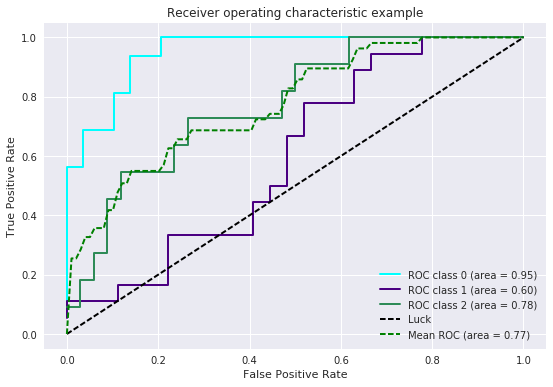

In [276]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.preprocessing import LabelBinarizer

# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

lb = LabelBinarizer()
transformed_target = lb.fit_transform(iris.target)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

for class_index, color in zip(range(len(lb.classes_)), colors):
    (train, test)
    probabilities = classifier.fit(X_train, y_train[:,class_index]).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test[:,class_index], probabilities[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC class %s (area = %0.2f)' % (lb.classes_[class_index], roc_auc))
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

mean_tpr /= len(lb.classes_)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Koho by zaujimali dalsie podrobnosti o vyhodnocovani klasifikatorov a statisticke testy, tak perfektna prezentacia je tu:
http://www.icmla-conference.org/icmla10/CFP_Tutorial_files/jose.pdf

Podrobnejsie o ROC: http://cmp.felk.cvut.cz/~hlavac/TeachPresEn/31PattRecog/13ClassifierPerformance.pdf

### Existuje tiez Precison-recall curve, ktora ma podobne vlastnosti ako ROC, ale namiesto sensitivity a specificity sa pouziva precision a recall. V niektorych domenach sa tato pouziva castejsie

# Hyperparameter tuning

Rozne klasifikatory maju rozne parametre, ktore mozeme nastavovat a tak zlepsovat ich uspesnost na konkretnom datasete. Tieto sa volaju Hyperparametre.

Mozeme ich skusat nastavovat manualne, intuitivne, alebo mozeme na to ist hrubou silou. 

## GridSearch - prehladavanie mriezky moznych parametrov

In [278]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Trosku zasumime tie data, aby to vyzeralo krajsie
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [283]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier

cv_params = {'max_depth': [1,2,3,4] + list(range(5,10,2)), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 3] }
ind_params = {'random_state': 0}
optimization = GridSearchCV(clf(**ind_params), 
                            cv_params, 
                             scoring = 'f1_macro', cv = 5, n_jobs = -1, verbose=True) 

In [284]:
iris.data.shape # to znamena, ze hlbka stromu 4 by mala stacit. Uvidime co to spravi

(150, 4)

In [285]:
X.shape # uvidime, aky vplyv na vykon podla hlbky stromu bude mat ten sum 

(150, 804)

In [286]:
# Niez to spustime, tak si skusme najskor pozriet, ake vsetky kombinacie to bude skusat
from sklearn.grid_search import ParameterGrid
list(ParameterGrid(cv_params))

[{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1},
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_sampl

In [287]:
%%time
optimization.fit(X, y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:113

CPU times: user 10.3 s, sys: 17.5 s, total: 27.9 s
Wall time: 31.5 s


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 3], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=True)

In [288]:
optimization.grid_scores_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.55556, std: 0.00000, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 1},
 mean: 0.55556, std: 0.00000, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 1},
 mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 2},
 mean: 0.90537, std: 0.07619, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.91145, std: 0.06483, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.89286, std: 0.07450, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.90466, std: 0.06032, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 4},
 mean: 0.89286, std: 0.07450, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.90466, std: 0.06032, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 5},


In [289]:
sorted(optimization.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 1, 'criterion': 'gini', 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 1, 'criterion': 'entropy', 'max_depth': 2},
 mean: 0.93327, std: 0.04716, params: {'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 2},
 mean: 0.91145, std: 0.06483, params: {'min_samples_leaf': 3, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.91138, std: 0.06126, params: {'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 4},
 mean: 0.91138, std: 0.06126, params: {'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 5},
 mean: 0.91138, std: 0.06126, params: {'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 7},
 mean: 0.91138, std: 0.06126, params: {'min_samples_leaf': 3, 'criterion': 'entropy', 'max_depth': 9},
 mean: 0.90647, std: 0.07443, params: {'min_samples_leaf': 1, 'criterion': 'entrop

In [290]:
list(filter(lambda x: 'best' in x, dir(optimization)))

['best_estimator_', 'best_index_', 'best_params_', 'best_score_']

In [291]:
optimization.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Velky pozor na pretrenovanie.

# Prehladavanim (manualnym alebo automatickym) priestoru parametrov pridavam dalsi stupen trenovania. Mal by som mat dalsiu testovaciu vzorku, na ktorej ukazem ocakavanu uspesnost.
Tym, ze hladam najlepsiu uspesnost na testovacej vzorke pridavam dalsiu uroven trenovania a hrozi mi problem optimalizacie na testovacie data (vid. leaderboard optimization). Ak ma zaujima ocakavana uspesnost na datach, ktore model nikdy nevidel, tak by som mal mat este jednu (validacnu) vzorku, na ktorej overim len ten uplne posledny model. Uspesnost na tejto vzorke bude uspesnost, ktoru budem moct ocakavat v produkcii, na datach, ktore model nikdy nevidel.

# Variance / Bias 

![bias-variance](img/bias-variance2.jpg)

* **Bias** je chyba spôsobená aproximáciou zložitého problému jednoduchším modelom - nieco nam v tom modely chyba

* **Variancia** nám hovorí, ako velmi by sa zmenil model, ak by sme použili inú trénovaciu sadu

## Pekne sa to vizualizuje na regresii

![overfit](img/overfit.png)

* Ak máme velmi velky bias, tak to znamena, ze mame nedotrenovany model (underfitting) a nieco nam v nom chyba
* Ak mame velku varianciu, tak to indikuje, ze sme model pretrenovali (overfitting)

## Celkova chyba je zlozena z variancie a biasu

Tieto dve chyby nevieme od seba oddelit, ale snazime sa najst bod, kde su v minime

![bias-variance](img/bias-variance.png)

## Snazime sa najst taku zlozitost modelu, aby som mal co najmensiu chybu na datach, ktore model nikdy nevidel

![validation error](img/validation-error.png)


zdroj obrazkov:
* [http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html](http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html),
* [https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted) a 
* [http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/BiasVariance.html)

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Rozdelíme údaje
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('# train data: ', len(X_train))
print('# test data: ', len(X_test))

# train data:  455
# test data:  114


In [168]:
results = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    # Vytvoríme rozhodovací strom
    clf = DecisionTreeClassifier(max_depth = i) # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    
    pred = clf.fit(X_train, y_train).predict(X_train) # natrenovanie modelu a predikovanie na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) # chyba na trenovacej sade
    
    pred = clf.predict(X_test)
    row['test'] = 1-accuracy_score(y_test, pred) # chyba na testovacej sade
    results.append(row)

In [169]:
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,test,train
0,1,0.140351,0.065934
1,2,0.131579,0.052747
2,3,0.122807,0.021978
3,4,0.105263,0.017582
4,5,0.070175,0.008791


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


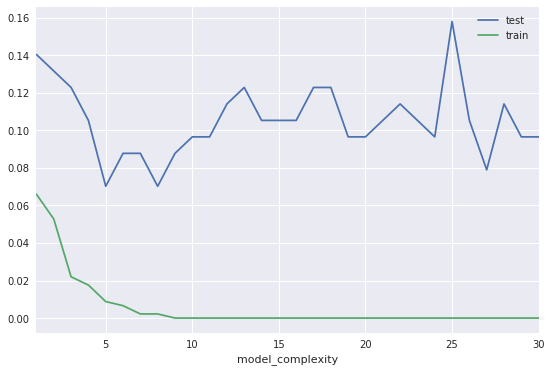

In [170]:
complexity_df.plot(x='model_complexity')

S rastucou zlozitostou modelu sa mi nijak nezmensuje chyba na trenovacej vzorke. Na testovacej tiez nie. Vacsinou sa dokonca zvacsuje. Toto je indikator toho, ze sme ten model preucili. Naucil sa data a nie vztahy za nimi. Ak skusame predikciu na inych datach, tak narazime na velku chybu sposobenu varianciou

## Varianciu a bias viem kontrolovat mnozstvom dat

* pridame trenovacie data (nasledujuci priklad)
* pridame dalsie atributy (pozor, zvysuje sa tak zlozitost modelu)

In [104]:
%%time
from sklearn.model_selection import cross_val_score

np.random.seed(42)

score_data = pd.DataFrame()
for i in range(2, 11):
    mean_scores = []
    for _ in range(100):
        cls = RandomForestClassifier()
        scores = cross_val_score(cls, features, labels, cv=i)
        mean_scores.append(scores.mean())
    score_data[i] = mean_scores
score_data.head()

CPU times: user 2min 40s, sys: 272 ms, total: 2min 40s
Wall time: 2min 40s


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


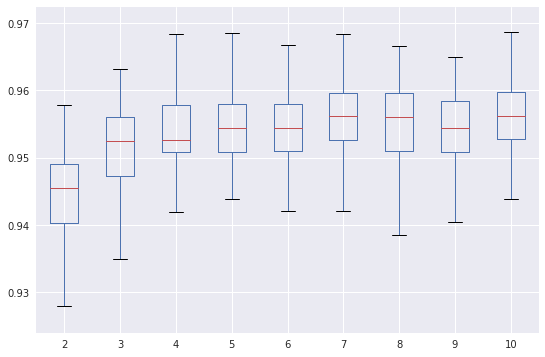

In [105]:
score_data.plot(kind='box')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


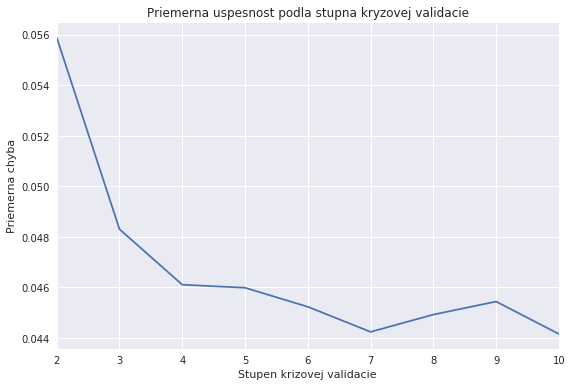

In [172]:
ax = (1-score_data.mean()).plot(title='Priemerna uspesnost podla stupna kryzovej validacie')
ax.set_xlabel('Stupen krizovej validacie')
ax.set_ylabel('Priemerna chyba')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


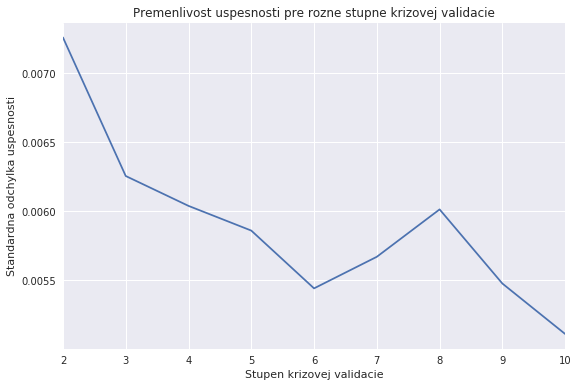

In [108]:
ax = score_data.std().plot(title='Premenlivost uspesnosti pre rozne stupne krizovej validacie')
ax.set_xlabel('Stupen krizovej validacie')
ax.set_ylabel('Standardna odchylka uspesnosti')

Pomocou krizovej validacie sme menili mnozstvo dat, ktore sa pouziva na trenovanie a testovanie (cim vyssi stupen krizovej validacie, tym mensia je testovacia vzorka. Je to len 1 k-tina vsetkych dat).

Ked stupa mnozstvo dat, tak sa zmensuje bias, pretoze jednoducho davame viac dokazov, ktore sa daju pouzit na vytvorenie modelu. Klesa tiez variancia, pretoze ten model je stabilnejsi.

# Existuju aj dalsie sposoby ako kontrolovat varianciu a bias

## Ucenie suborom metod
* **Bagging** sa pouziva na znizenie variancie
* **Boosting** sa pouziva na znizenie biasu

## Zjednodusenie modelu
* Vyber atributov
* Regularizacia
* Orezavanie stromov